<a href="https://colab.research.google.com/github/sarjakpatel/SJSU/blob/main/CMPE%20255/Assignment%204/CMPE_255_Gaussian_Mixture_Model_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 255 Clustering Assignment : Gaussian Mixture Model Clustering

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
wine_data=load_wine()
data = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
X= data.values
y= wine_data.target
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
X.shape

(178, 13)

## Data Transforming

In [4]:
from sklearn.preprocessing import normalize

data_scaled = normalize(X)
data_scaled = pd.DataFrame(data_scaled,columns=data.columns)
data_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753


In [5]:
pca = PCA(2)
  
#Transform the data
X_tranformed = pca.fit_transform(data_scaled)

## Gaussian Mixture Model Clustering

Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.

Let’s say we have four Gaussian distributions (more on that in the next section) – GD1, GD2, GD3 and GD4. These have a certain mean (μ1, μ2, μ3, μ4) and variance (σ1, σ2, σ3, σ4) value respectively. For a given set of data points, the GMM would identify the probability of each data point belonging to each of these distributions.


In [6]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X_tranformed)

In [ ]:
#predictions from gmm
labels = gmm.predict(X_tranformed)

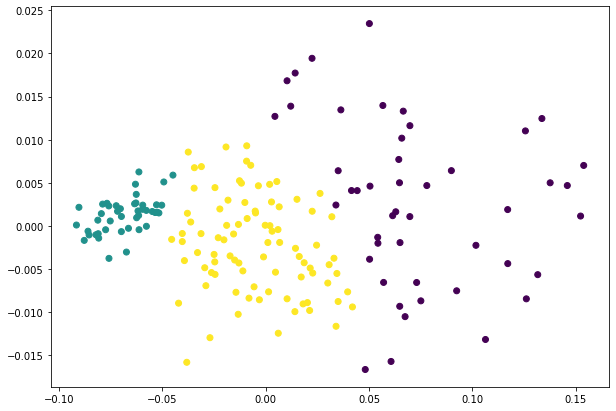

In [8]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_tranformed[:,0], X_tranformed[:,1], c=labels)